## Import necessary modules

In [2]:
# show images inline
%matplotlib inline

# automatically reload modules when they have changed
%load_ext autoreload
%autoreload 2

# import keras
import keras

# import keras_retinanet
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color
from keras_retinanet.utils.gpu import setup_gpu

# import miscellaneous modules
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import time

# use this to change which GPU to use
gpu = 0

# set the modified tf session as backend in keras
setup_gpu(gpu)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Convert best training model into inference model

In [14]:
!retinanet-convert-model --help

Using TensorFlow backend.
usage: retinanet-convert-model [-h] [--backbone BACKBONE] [--no-nms]
                               [--no-class-specific-filter] [--config CONFIG]
                               model_in model_out

Script for converting a training model to an inference model.

positional arguments:
  model_in              The model to convert.
  model_out             Path to save the converted model to.

optional arguments:
  -h, --help            show this help message and exit
  --backbone BACKBONE   The backbone of the model to convert.
  --no-nms              Disables non maximum suppression.
  --no-class-specific-filter
                        Disables class specific filtering.
  --config CONFIG       Path to a configuration parameters .ini file.


In [15]:
!retinanet-convert-model /Users/akharina/Documents/BootCamp/Capstone/snapshots/augmented/resnet50_csv_09.h5 /Users/akharina/Documents/BootCamp/Capstone/snapshots/augmented/model.h5 --config /Users/akharina/Documents/BootCamp/Capstone/elephant_detection/config/config.ini 

Using TensorFlow backend.
2019-12-01 15:25:34.451530: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2019-12-01 15:25:34.461502: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f88a07eeeb0 executing computations on platform Host. Devices:
2019-12-01 15:25:34.461516: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): Host, Default Version
tracking <tf.Variable 'Variable:0' shape=(15, 4) dtype=float32, numpy=
array([[ -8.774536 ,  -4.668053 ,   8.774536 ,   4.668053 ],
       [-11.604323 ,  -6.1735   ,  11.604323 ,   6.1735   ],
       [-14.631538 ,  -7.7839785,  14.631538 ,   7.7839785],
       [ -7.3029675,  -5.6086793,   7.3029675,   5.6086793],
       [ -9.6581745,  -7.4174776,   9.6581745,   7.4174776],
       [-12.177698 ,  -9.352472 ,  12.177698 ,   9.352472 ],
       [ -6.4      ,  -6.4      ,   6.4      ,   6.4      ],
       [ -8.464   

In [79]:
# Load model

model_path = '../snapshots/augmented/model.h5'

model = models.load_model(model_path, backbone_name='resnet50')

# Define label 
labels_to_names = {0: 'elephant'}

tracking <tf.Variable 'Variable:0' shape=(15, 4) dtype=float32, numpy=
array([[ -8.774536 ,  -4.668053 ,   8.774536 ,   4.668053 ],
       [-11.604323 ,  -6.1735   ,  11.604323 ,   6.1735   ],
       [-14.631538 ,  -7.7839785,  14.631538 ,   7.7839785],
       [ -7.3029675,  -5.6086793,   7.3029675,   5.6086793],
       [ -9.6581745,  -7.4174776,   9.6581745,   7.4174776],
       [-12.177698 ,  -9.352472 ,  12.177698 ,   9.352472 ],
       [ -6.4      ,  -6.4      ,   6.4      ,   6.4      ],
       [ -8.464    ,  -8.464    ,   8.464    ,   8.464    ],
       [-10.672    , -10.672    ,  10.672    ,  10.672    ],
       [ -5.611014 ,  -7.2999287,   5.611014 ,   7.2999287],
       [ -7.420565 ,  -9.654156 ,   7.420565 ,   9.654156 ],
       [ -9.356365 , -12.172631 ,   9.356365 ,  12.172631 ],
       [ -4.668922 ,  -8.772903 ,   4.668922 ,   8.772903 ],
       [ -6.174649 , -11.602164 ,   6.174649 ,  11.602164 ],
       [ -7.785427 , -14.628817 ,   7.785427 ,  14.628817 ]],
      dtype=f

/Users/akharina/.local/lib/python3.7/site-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [82]:
!../Resources/RetinaNet/keras-retinanet/keras_retinanet/bin/evaluate.py --help

Using TensorFlow backend.
usage: evaluate.py [-h] [--convert-model] [--backbone BACKBONE] [--gpu GPU]
                   [--score-threshold SCORE_THRESHOLD]
                   [--iou-threshold IOU_THRESHOLD]
                   [--max-detections MAX_DETECTIONS] [--save-path SAVE_PATH]
                   [--image-min-side IMAGE_MIN_SIDE]
                   [--image-max-side IMAGE_MAX_SIDE] [--config CONFIG]
                   {coco,pascal,csv} ... model

Evaluation script for a RetinaNet network.

positional arguments:
  {coco,pascal,csv}     Arguments for specific dataset types.
  model                 Path to RetinaNet model.

optional arguments:
  -h, --help            show this help message and exit
  --convert-model       Convert the model to an inference model (ie. the input
                        is a training model).
  --backbone BACKBONE   The backbone of the model.
  --gpu GPU             Id of the GPU to use (as reported by nvidia-smi).
  --score-threshold SCORE_THRESHOLD
   

In [69]:
!../Resources/RetinaNet/keras-retinanet/keras_retinanet/bin/evaluate.py  --iou-threshold 0.4 --score-threshold 0.1 --save-path /Users/akharina/Documents/BootCamp/Capstone/inference_iou04_score01 csv /Users/akharina/Documents/BootCamp/Capstone/elephant_detection/test_annot.csv /Users/akharina/Documents/BootCamp/Capstone/elephant_detection/classes.csv /Users/akharina/Documents/BootCamp/Capstone/snapshots/augmented/model.h5

Using TensorFlow backend.
Loading model, this may take a second...
2019-12-02 15:17:35.990292: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2019-12-02 15:17:36.000491: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f9c138347b0 executing computations on platform Host. Devices:
2019-12-02 15:17:36.000522: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): Host, Default Version
tracking <tf.Variable 'Variable:0' shape=(15, 4) dtype=float32, numpy=
array([[ -8.774536 ,  -4.668053 ,   8.774536 ,   4.668053 ],
       [-11.604323 ,  -6.1735   ,  11.604323 ,   6.1735   ],
       [-14.631538 ,  -7.7839785,  14.631538 ,   7.7839785],
       [ -7.3029675,  -5.6086793,   7.3029675,   5.6086793],
       [ -9.6581745,  -7.4174776,   9.6581745,   7.4174776],
       [-12.177698 ,  -9.352472 ,  12.177698 ,   9.352472 ],
       [ -6.4      ,  -6.4      ,   6.

## Perform inference on and save individual image

processing time:  1.6382288932800293


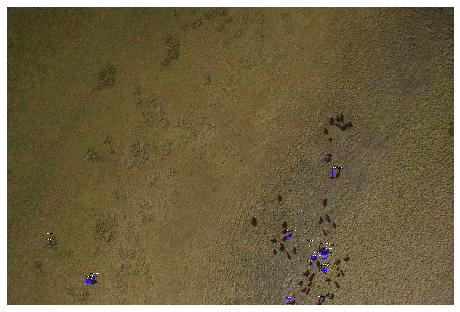

In [90]:
# load image
image = read_image_bgr('../data/test_images/460853c71352ae1a5ac18d1722ac7406ccaafaf5.jpg')

# copy to draw on
draw = image.copy()
draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

# preprocess image for network
image = preprocess_image(image)
image, scale = resize_image(image)

# process image
start = time.time()
boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
print("processing time: ", time.time() - start)

# correct for image scale
boxes /= scale

# visualize detections
for box, score, label in zip(boxes[0], scores[0], labels[0]):
    # scores are sorted so we can break
    if score < .1:
        break
        
    color = label_color(label)
#     color = 3
    
    b = box.astype(int)
    draw_box(draw, b, color=color)
    
    caption = "{} {:.3f}".format(labels_to_names[label], score)
    draw_caption(draw, b, caption)
    
plt.figure(figsize=(8,10))
plt.axis('off')
plt.imshow(draw)

plt.savefig('../inference/460853c71352ae1a5ac18d1722ac7406ccaafaf5.png', dpi=960)

plt.show()